In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

In [2]:
data=pd.read_csv("C:\\Users\\91755\\Desktop\\Excelr Assignments\\MLR\\MLR\\ToyotaCorolla - MLR.csv")
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [9]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


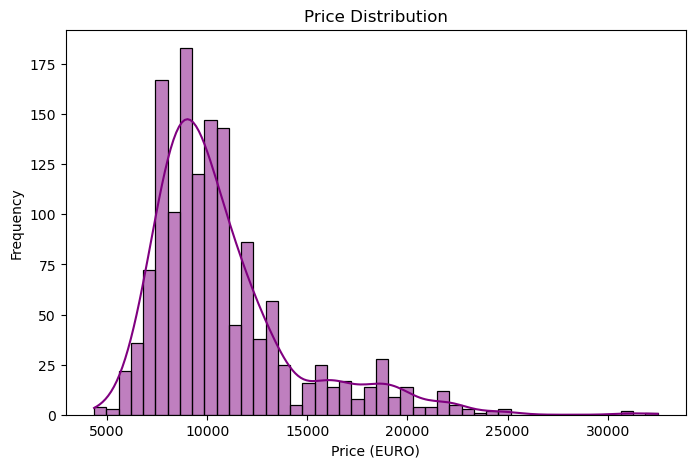

In [11]:
#task1:Visualizations and Summary Statistics
plt.figure(figsize=(8,5))
sns.histplot(data['Price'],kde=True, color='purple')
plt.title('Price Distribution')
plt.xlabel('Price (EURO)')
plt.ylabel('Frequency')
plt.show()

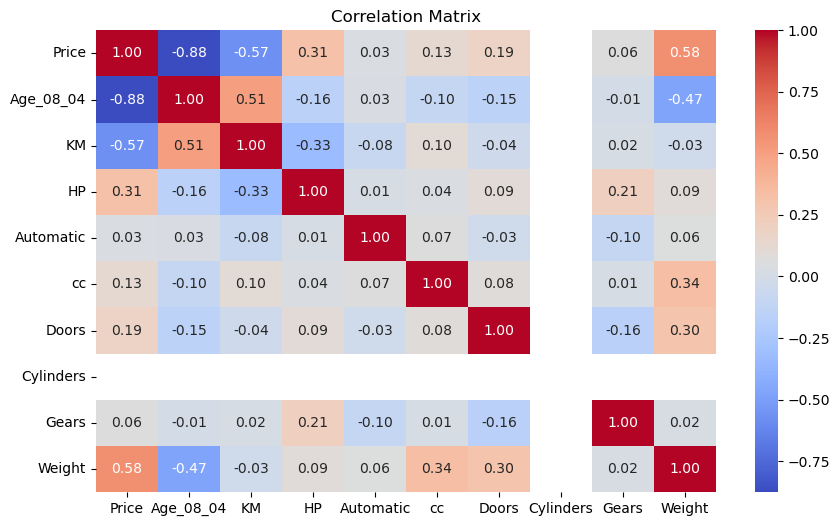

In [13]:
#Correlation Heatmap
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
     

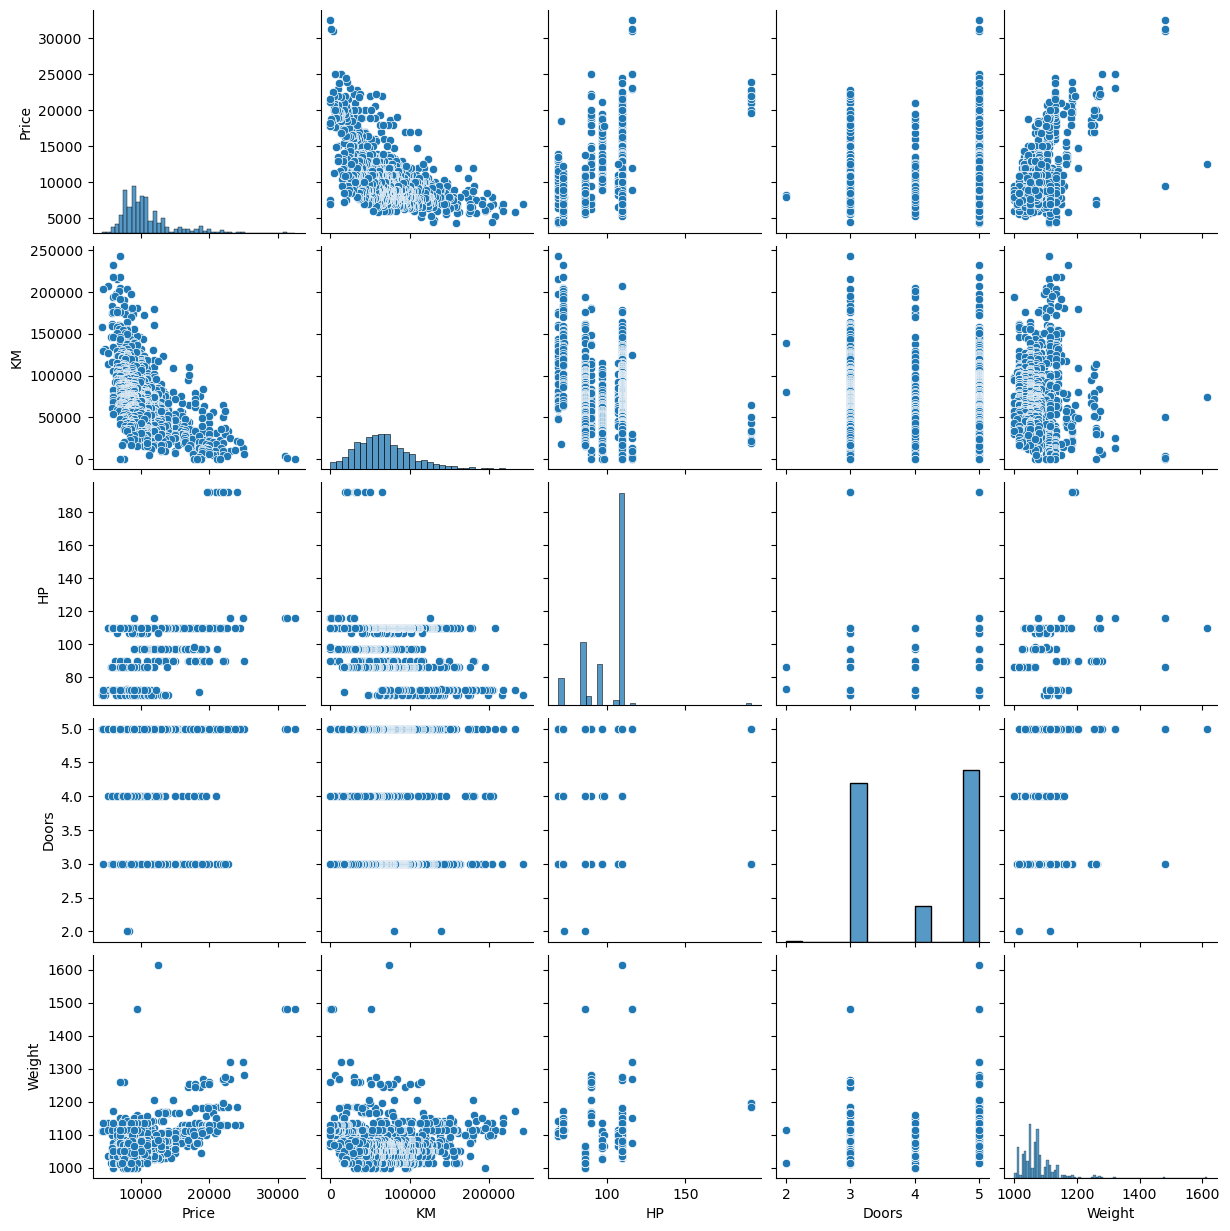

In [15]:
#Pair Plot of Numeric Variables
# Check available numeric columns
numeric_columns = ['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Weight']  # Expected columns
available_columns = [col for col in numeric_columns if col in data.columns]

# Pairplot with available numeric columns
sns.pairplot(data[available_columns])
plt.show()


In [17]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [19]:
# Handle categorical variables and scaling
categorical_cols = ['FuelType']
numeric_cols = ['Age', 'KM', 'HP', 'CC', 'Weight', 'Quarterly_Tax']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(      Age_08_04      KM Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
 899          62   59295    Petrol   86          0  1300      5          4   
 881          68   61568    Petrol  110          0  1600      4          4   
 310          40   38653    Petrol  110          0  1600      5          4   
 1145         75  101855    Petrol  110          0  1600      5          4   
 31           22   35199    Petrol   97          0  1400      3          4   
 ...         ...     ...       ...  ...        ...   ...    ...        ...   
 1095         76  125778    Petrol  110          0  1600      3          4   
 1130         73  107108    Petrol  110          0  1600      3          4   
 1294         80   71740    Petrol  110          0  1600      5          4   
 860          63   64690    Petrol   86          0  1300      3          4   
 1126         80  110000    Petrol  110          0  1600      4          4   
 
       Gears  Weight  
 899       5    1035  
 881       5    

In [21]:
print(X_train.columns)
print(numeric_cols)

Index(['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')
['Age', 'KM', 'HP', 'CC', 'Weight', 'Quarterly_Tax']


In [23]:
# Check column names in the dataset
print("Dataset Columns:", X.columns)

# Ensure preprocessing matches dataset
categorical_cols = ['FuelType']  # Update with actual column names
numeric_cols = ['Age', 'KM', 'HP', 'CC', 'Weight', 'Quarterly_Tax']  # Update as necessary

# Update preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# Rebuild the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])

# Fit the pipeline
try:
    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    print("Model 1 Performance:")
    print("Train R2:", r2_score(y_train, y_pred_train))
    print("Test R2:", r2_score(y_test, y_pred_test))
    print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
    print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
except ValueError as e:
    print("Error:", e)



Dataset Columns: Index(['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')
Error: A given column is not a column of the dataframe


In [25]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.api as sm

# Debugging: Verify X_train structure
print("X_train type:", type(X_train))
if isinstance(X_train, pd.DataFrame):
    print("X_train columns:", X_train.columns)
else:
    raise ValueError("X_train is not a DataFrame. Convert it to a DataFrame with proper column names.")

# Update column lists based on X_train
numeric_cols = ['Age', 'KM', 'HP', 'CC', 'Weight', 'Quarterly_Tax']
categorical_cols = ['FuelType']

# Ensure columns exist in X_train
numeric_cols = [col for col in numeric_cols if col in X_train.columns]
categorical_cols = [col for col in categorical_cols if col in X_train.columns]

if not numeric_cols and not categorical_cols:
    raise ValueError("No valid columns found in X_train for preprocessing!")

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Transform X_train
X_train_transformed = preprocessor.fit_transform(X_train)

# Extract transformed feature names
cat_transformed_cols = (
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    if categorical_cols else []
)
all_feature_names = numeric_cols + list(cat_transformed_cols)

# Convert transformed data to DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_feature_names, index=X_train.index)

# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train_transformed_df)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())


X_train type: <class 'pandas.core.frame.DataFrame'>
X_train columns: Index(['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     743.3
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          4.56e-268
Time:                        13:06:08   Log-Likelihood:                -10415.
No. Observations:                1148   AIC:                         2.084e+04
Df Residuals:                    1144   BIC:                         2.086e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
      

In [27]:
# Lasso Regression
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', lasso)])
lasso_pipeline.fit(X_train, y_train)
lasso_coef = lasso_pipeline.named_steps['model'].coef_
print("Lasso Coefficients:", lasso_coef)

Lasso Coefficients: [-1928.51232207   310.11524985  2064.14866807]


In [29]:
# Ridge Regression
ridge = Ridge(alpha=0.1, max_iter=10000)
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', ridge)])
ridge_pipeline.fit(X_train, y_train)
ridge_coef = ridge_pipeline.named_steps['model'].coef_
print("Ridge Coefficients:", ridge_coef)

Ridge Coefficients: [-1928.40717169   310.22951266  2064.06254519]


In [31]:
# Compare models
print("Lasso R2 (Test):", r2_score(y_test, lasso_pipeline.predict(X_test)))
print("Ridge R2 (Test):", r2_score(y_test, ridge_pipeline.predict(X_test)))

Lasso R2 (Test): 0.6088066959858597
Ridge R2 (Test): 0.6088152368041639


In [41]:
# Remove constant columns
X_vif = X_vif.loc[:, (X_vif != X_vif.iloc[0]).any()]
X_vif

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,90,0,2000,3,5,1165
1,23,72937,90,0,2000,3,5,1165
2,24,41711,90,0,2000,3,5,1165
3,26,48000,90,0,2000,3,5,1165
4,30,38500,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025
1432,72,19000,86,0,1300,3,5,1015
1433,71,17016,86,0,1300,3,5,1015
1434,70,16916,86,0,1300,3,5,1015


In [45]:
# Correlation matrix
correlation_matrix = X_vif.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find features with correlation > 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated features
X_vif = X_vif.drop(columns=to_drop)
X_vif

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,90,0,2000,3,5,1165
1,23,72937,90,0,2000,3,5,1165
2,24,41711,90,0,2000,3,5,1165
3,26,48000,90,0,2000,3,5,1165
4,30,38500,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025
1432,72,19000,86,0,1300,3,5,1015
1433,71,17016,86,0,1300,3,5,1015
1434,70,16916,86,0,1300,3,5,1015


In [47]:
# Add a constant column for VIF calculation
X_vif["constant"] = 1

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nUpdated VIF:")
print(vif)

# Remove the constant column after VIF calculation
X_vif = X_vif.drop(columns=["constant"])



Updated VIF:
     Feature          VIF
0  Age_08_04     1.909676
1         KM     1.679142
2         HP     1.218066
3  Automatic     1.047677
4         cc     1.150898
5      Doors     1.155484
6      Gears     1.109188
7     Weight     1.664910
8   constant  1378.328904


In [55]:
# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop the identified features
data_reduced = data.drop(columns=to_drop)

print(f"Features dropped due to high correlation: {to_drop}")


Features dropped due to high correlation: []


In [ ]:
1.What is Normalization & Standardization and how is it helpful?
-->Normalization: Rescales data to a specific range, typically [0, 1].
Xnormalized= Xmax −X min/X−Xmin
Use: For algorithms sensitive to scale (e.g., KNN, SVM).
-->Standardization: Centers data around 0 with a standard deviation of 1.
Xstandardized= X−μ/σ
Use: For algorithms assuming Gaussian distributions (e.g., linear regression, PCA).
Helpful for: Ensuring features contribute equally to the model and improving convergence in optimization.

2.What techniques can be used to address multicollinearity in multiple linear regression?
-->Variance Inflation Factor (VIF):Remove variables with high VIF (threshold ~5 or 10).
Regularization:Use Ridge or Lasso regression to penalize correlated features.
Principal Component Analysis (PCA):Transform features into uncorrelated components.
Feature Selection:Drop redundant variables based on domain knowledge.
Combine Variables:Create a composite feature if variables are highly correlated.
